# ML-7. Кластеризация
Задача кластеризации: найти отображение множества входных объектов $X$, которое разделило бы множество $X$ на подгруппы. Кластеризация — это обучение без учителя.

Формальная запись задачи кластеризации выглядит следующим образом:

Пусть $X$ — множество объектов,  $Y$ — множество метод кластеров (идентификаторов их принадлежности). На множестве $X$ задана функция, которая вычисляет расстояние между объектами:

$\rho\left(x, x^{\prime}\right)$. 

Также дана конечная обучающая выборка объектов: $X^{m}=\left\{x_{1}, \ldots, x_{m}\right\} \subset X$ 

Нам надо разбить выборку на кластеры, то есть поставить каждому объекту $X$ в соответствие метку $y_{i} \in Y$ так, чтобы внутри каждого кластера объекты были как можно более близки (то есть расстояние должно быть минимальным), а объекты из разных кластеров значительно различались.

В задаче кластеризации входные данные задаются двумя способами:

- Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
- Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных
объектов выборки

**Некорректность задачи кластеризации** — решение задачи кластеризации принципиально неоднозначно:

- Нет **точной постановки** задачи кластеризации.
- Существует **множество критериев** качества кластеризации.
- Существует **множество методов** кластеризации.
- Часто заранее **неизвестно число кластеров**.
- Результат кластеризации зависит от **метрики**, которая **задаётся субъективно**.

**Разные цели кластеризации:**
- Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности
- Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные
- Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров
- Построить иерархию множества объектов: задача таксономии.  

**Разнообразие условий задач кластеризации.**
- Подробнее про условия задач мы поговорим в следующем уроке.

## 7.5. K-means. Практика

Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [22]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:


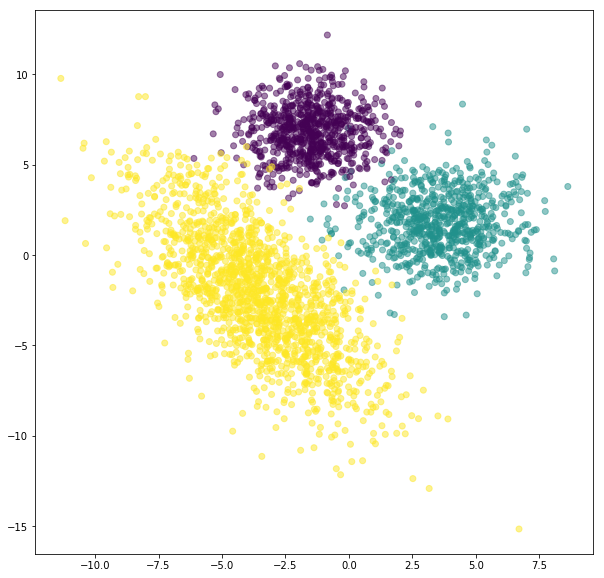

In [23]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [24]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
# pd.Series(counts,index=unique)

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [25]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

- n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
- init — способ начальной инициализации центроидов кластров;
- random_state — фиксирует генерацию случайного числа для инициализации центроидов.

Полный список параметров доступен в https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html - 

### Задание 7.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:
```python
k_means.fit(X)
```
Обучив, мы можем получить центроиды кластеров:
```python
k_means.cluster_centers_
```
И узнать, в какой кластер попал каждый из объектов:
```python
k_means.labels_
```
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.   

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

# Вывод
[0 1 2]
```
`astype(np.int)` конвертирует элементы массива в целые числа.

Подсказка: В ответ скопируйте и вставьте вывод кода. Пример ввода: [[X Y] [A B] [C D]]. Числа должны быть целые, без десятичных знаков и точек.

In [26]:
k_means = KMeans(n_clusters=3,random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [27]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


### Задание 7.5.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром `return_counts=True`:
```python
import numpyas np
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
# Вывод
3 2 1
```
Для визуализации получившегося датасета можно использовать следующий код:
```python
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()
```

In [31]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

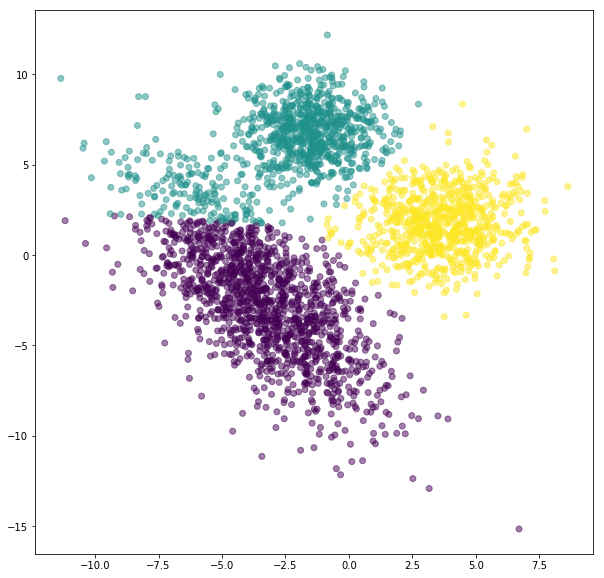

In [32]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

## ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

В датасете для учеников предоставлены следующие признаки:

- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv('./Unit_6_data/snsdata.csv')

X_sc = df.drop(columns=['gradyear','gender','age','friends'])

In [51]:
X_sc.head(10)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_sc)

In [55]:
k_means_sc = KMeans(n_clusters=9, random_state=123)

In [56]:
k_means_sc.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

### Задание 7.5.4
Укажите номер кластера, в который попало меньше всего учеников.

In [57]:
unique, counts = np.unique(k_means_sc.labels_,return_counts=True)

clasters_count = pd.Series(counts,index=unique)
clasters_count.idxmin()

5

In [63]:
clasters_count

0     5036
1     1337
2      752
3      697
4    20024
5        1
6      846
7      466
8      841
dtype: int64

В один из кластеров попали ученики с интересами ***music, god, dance, hair, shopping, cute, band, rock, football, church***. Сколько всего учеников попали в этот кластер?

In [58]:
features = df.drop(columns=['gradyear','gender','age','friends']).columns

In [59]:
x_feat = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']

In [60]:
x = [[int(f in x_feat) for f in features]]

In [61]:
x_claster = k_means.predict(x)

In [62]:
clasters_count[x_claster]

0    5036
dtype: int64

## 7.6. EM-алгоритм. Практика
Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:
```python
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()
```
В отличие от остальных рассматриваемых алгоритмов, ****EM-алгоритм*** лежит не в модуле `cluster`, а в модуле `mixture`. ***EM-алгоритм*** определяет смеси распределений в выборке, а не просто проводит кластеризацию.

Для обучения модели GaussianMixture необходимо вызвать метод ```fit```, передав входным параметром признаки объектов датасета:
```python
gm.fit(X)
```
Получить предсказания можно с помощью метода predict после метода `fit`:
```python
gm.fit(X)
y_pred = gm.predict(X)
```
Можно совместить эти два шага при помощи метода `fit_predict`:
```python
y_pred = gm.fit_predict(X)
```
Обучив, мы можем получить параметры распределений кластеров, например, средние:
```python
means = gm.means_
```

### Задание 7.6.2
Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

[0 1 2]
```  
`astype(np.int)` конвертирует элементы массива в целые числа.

В ответ скопируйте и вставьте вывод кода. 
Пример ввода: `[[X Y] [A B] [C D]]`

In [64]:
from sklearn.mixture import GaussianMixture

In [65]:
gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [67]:
print(np.round(gm.means_).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


### Задание 7.6.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [76]:
_, counts = np.unique(gm.predict(X),return_counts=True)
for cnt in counts: print (cnt, end=' ')

744 763 1493 

### Задание 7.6.4
Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним ***EM-алгоритм*** , количество кластеров — `9`, `random_state = 123`. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [94]:
gm_sc = GaussianMixture(n_components=9, random_state=123)
gm_sc.fit(X_sc)

gm_sc.predict(X_sc[7:8])

array([3], dtype=int64)

Сколько итераций до схождения осуществил алгоритм? Вопрос относится к датасету об учениках старшей школы.

In [93]:
gm_sc.n_iter_

22

### 7.7. Агломеративная кластеризация. Практика
При инициализации можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

In [95]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

In [96]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Error",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

NameError: name 'blobs' is not defined